In [2]:
# Programmer: Matt Woodmansee

# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress, ttest_ind, sem
import pylab as pl
import numpy as np

In [3]:
# read in the two csv files (census data and school performance)

#census data read
census_df = pd.read_csv("../Resources/clean_census.csv")

#school performance data read
school_df = pd.read_csv("../Resources/Combined_HS_Performance_Data.csv")


In [4]:
#making sure we understand the contents of the school csv file.
school_df.columns

Index(['DBN', 'graduation_rate_2011', 'college_career_rate_2011',
       'graduation_rate_2012', 'college_career_rate_2012',
       'graduation_rate_2013', 'college_career_rate_2013',
       'graduation_rate_2014', 'college_career_rate_2014', 'Address',
       'Borough Name', 'Community Board', 'Council District ', 'Census Tract',
       'NTA', 'Precinct', 'Population'],
      dtype='object')

In [5]:
#because there are multiple schools in many NTAs, we needed to group the schools by the NTA to get the overall numbers.
school_summary = school_df.groupby("NTA")
NTA_grad_rate = school_summary["graduation_rate_2014"].mean()
NTA_college_rate = school_summary["college_career_rate_2014"].mean()

In [6]:
census_df.head()

,Total Population,Did Not Grad HS,Grad HS or Higher,Bachelor Degree or Higher,households,NTA,Median Household Income,Total Pop 25 and over
0,48351,2734,29374,11362,16432,Georgetown-Marine Park-Bergen Beach-Mill Basin,1520979.0,32108
1,61584,6094,39445,16743,25070,Sheepshead Bay-Gerritsen Beach-Manhattan Beach,1054259.0,45539
2,100130,14357,52523,16187,40818,Crown Heights North,980637.0,66880
3,33155,5964,19097,9312,14888,East Williamsburg,519058.0,25061
4,24199,3630,13179,4001,7749,College Point,354073.0,16809


In [7]:
#add percentage column for educational attainment
census_df["Pct Did Not Grad HS"] = census_df["Did Not Grad HS"] / census_df["Total Pop 25 and over"]
census_df["Pct Grad HS or Higher"] = census_df["Grad HS or Higher"] / census_df["Total Pop 25 and over"]
census_df["Pct Bachelor Degree or Higher"] = census_df["Bachelor Degree or Higher"] / census_df["Total Pop 25 and over"]

In [8]:
#make the graduation rate and college rate dataframes so we can merge everything together.
HS_grad_rate = pd.DataFrame(NTA_grad_rate)
HS_college_rate = pd.DataFrame(NTA_college_rate)

In [9]:
HS_college_rate.head()

,college_career_rate_2014
NTA,
Annadale-Huguenot-Prince's Bay-Eltingville,0.660000
Astoria,0.563333
Auburndale,0.770000
Baisley Park,0.500000
Battery Park City-Lower Manhattan,0.668571


In [10]:
#merge the census dataframe with the two performance dataframes.
school_census_df = pd.merge(pd.merge(census_df, HS_grad_rate, on="NTA"), HS_college_rate, on="NTA")
school_census_df.head()

,Total Population,Did Not Grad HS,Grad HS or Higher,Bachelor Degree or Higher,households,NTA,Median Household Income,Total Pop 25 and over,Pct Did Not Grad HS,Pct Grad HS or Higher,Pct Bachelor Degree or Higher,graduation_rate_2014,college_career_rate_2014
0,61584,6094,39445,16743,25070,Sheepshead Bay-Gerritsen Beach-Manhattan Beach,1054259.0,45539,0.133819,0.866181,0.367663,0.960,0.910
1,100130,14357,52523,16187,40818,Crown Heights North,980637.0,66880,0.214668,0.785332,0.242031,0.545,0.410
2,33155,5964,19097,9312,14888,East Williamsburg,519058.0,25061,0.237979,0.762021,0.371573,0.750,0.595
3,28727,1787,17929,6037,9786,Annadale-Huguenot-Prince's Bay-Eltingville,521048.0,19716,0.090637,0.909363,0.306198,0.850,0.660
4,53800,9477,24580,5710,18657,Soundview-Castle Hill-Clason Point-Harding Park,490852.0,34057,0.278269,0.721731,0.167660,0.618,0.364


In [11]:
#create lists just for median household income analysis
x_med_df = school_census_df[["NTA", "Median Household Income", "graduation_rate_2014", "college_career_rate_2014"]]
x_med_df.head()

,NTA,Median Household Income,graduation_rate_2014,college_career_rate_2014
0,Sheepshead Bay-Gerritsen Beach-Manhattan Beach,1054259.0,0.960,0.910
1,Crown Heights North,980637.0,0.545,0.410
2,East Williamsburg,519058.0,0.750,0.595
3,Annadale-Huguenot-Prince's Bay-Eltingville,521048.0,0.850,0.660
4,Soundview-Castle Hill-Clason Point-Harding Park,490852.0,0.618,0.364


In [12]:
#To process the median household income, we need to remove the NaN value rows.
x_med_df.dropna(inplace = True)

C:\Users\Allen\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [13]:
#create lists for the median household income for xticks and yticks
med_yticks = ["40%", "50%", "60%", "70%", "80%", "90%", "100%"]
not_grad_HS = ["0%","0%","10%", "20%", "30%", "40%", "50%", "60%"]
HS_or_Greater = ["40%","50%", "60%", "70%", "80%", "90%", "100%"]
BachelorsDegree = ["0%", "10%", "20%", "30%","40%","50%", "60%", "70%", "80%", "90%"]

y=7.557478156219234e-08x+0.689644687540518


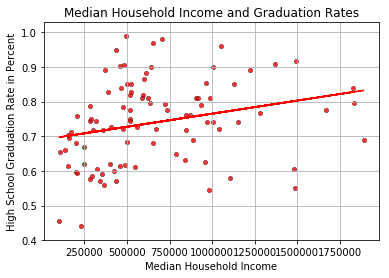

In [22]:
#create a scatterplot and trend line showing the relationship between Median Household income and the Graduation Rate.

x_med_df.plot(kind='scatter', x="Median Household Income", y="graduation_rate_2014", edgecolors = "Black", linewidths = 0.4, color="Red", alpha=0.8)

# calc the trendline
z = np.polyfit(x_med_df["Median Household Income"], x_med_df["graduation_rate_2014"], 1)
p = np.poly1d(z)
pl.plot(x_med_df["Median Household Income"],p(x_med_df["Median Household Income"]),"r--")


pl.ylabel("High School Graduation Rate in Percent")
pl.title("Median Household Income and Graduation Rates")
pl.grid(axis = "both")


# the line equation:
print(f"y={z[0]}x+{z[1]}")

plt.savefig("../Images/MedHouseIncome_GradRate.png")
plt.show()


In [26]:
#math to create the regression line for those that did not graduate HS and graduation rates.
(slope,intercept, _, _, _) = linregress(school_census_df["Pct Did Not Grad HS"], school_census_df["graduation_rate_2014"])
fit_DNGHS = slope * school_census_df["Pct Did Not Grad HS"] + intercept

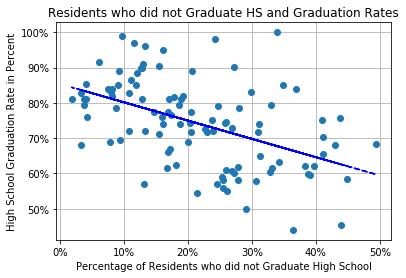

In [16]:
#create a scatterplot and trend line showing the relationship between those that did not graduate HS in the NTA
#and the Graduation Rate.
fig, ax = plt.subplots()

ax.plot(school_census_df["Pct Did Not Grad HS"], school_census_df["graduation_rate_2014"], linewidth = 0, marker='o')
ax.plot(school_census_df["Pct Did Not Grad HS"], fit_DNGHS, 'b--')

ax.set_xlabel("Percentage of Residents who did not Graduate High School")
ax.set_ylabel("High School Graduation Rate in Percent")
ax.set_title("Residents who did not Graduate HS and Graduation Rates")
ax.set_yticklabels(med_yticks)
ax.set_xticklabels(not_grad_HS)
ax.grid(axis = "both")

plt.savefig("../Images/Not_HS_GradRate.png")
plt.show()

In [25]:
#math to create the regression line for those that graduated HS or better and graduation rates.
(slope,intercept, _, _, _) = linregress(school_census_df["Pct Grad HS or Higher"], school_census_df["graduation_rate_2014"])
fit_DGHS = slope * school_census_df["Pct Grad HS or Higher"] + intercept

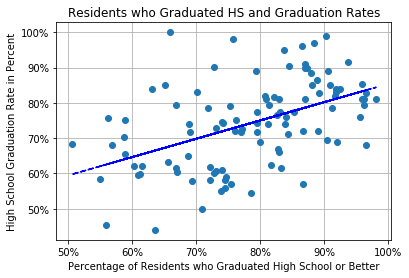

In [18]:
#create a scatterplot and trend line showing the relationship between those that graduated HS or better in the NTA
#and the Graduation Rate.

fig, ax = plt.subplots()

ax.plot(school_census_df["Pct Grad HS or Higher"], school_census_df["graduation_rate_2014"], linewidth = 0, marker='o')
ax.plot(school_census_df["Pct Grad HS or Higher"], fit_DGHS, 'b--')

ax.set_xlabel("Percentage of Residents who Graduated High School or Better")
ax.set_ylabel("High School Graduation Rate in Percent")
ax.set_title("Residents who Graduated HS and Graduation Rates")
ax.set_yticklabels(med_yticks)
ax.set_xticklabels(HS_or_Greater)
ax.grid(axis = "both")

plt.savefig("../Images/Grad_HS_orHigher_GradRate.png")
plt.show()

In [19]:
#math to create the regression line for those that received a Bachelor's Degree or better and graduation rates.
(slope,intercept, _, _, _) = linregress(school_census_df["Pct Bachelor Degree or Higher"], school_census_df["graduation_rate_2014"])
fit_BDOH = slope * school_census_df["Pct Bachelor Degree or Higher"] + intercept


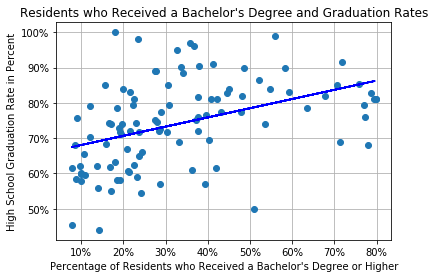

In [20]:
#create a scatterplot and trend line showing the relationship between those that graduated a 4-year college or better in the NTA
#and the Graduation Rate.
fig, ax = plt.subplots()

ax.plot(school_census_df["Pct Bachelor Degree or Higher"], school_census_df["graduation_rate_2014"], linewidth = 0, marker='o')
ax.plot(school_census_df["Pct Bachelor Degree or Higher"], fit_BDOH, 'b--')

ax.set_xlabel("Percentage of Residents who Received a Bachelor's Degree or Higher")
ax.set_ylabel("High School Graduation Rate in Percent")
ax.set_title("Residents who Received a Bachelor's Degree and Graduation Rates")
ax.set_yticklabels(med_yticks)
ax.set_xticklabels(BachelorsDegree)
ax.grid(axis = "both")

plt.savefig("../Images/BachelorsDegree_GradRate.png")
plt.show()

In [21]:
school_census_df.to_csv("../Resources/school_census.csv", index=False)